# Introduction to scRNA-seq
## Practical workshop on scRNA-seq analysis

### Part 1: Introduction and brief overview
This workshop is conducted by ***Andreas Møller$^{1,2}$*** and ***Kedar Natarajan$^{1,2}$***. 


Single-cell transcriptomics methods have seen unprecedented growth and development in the recent years. Single-cell RNA-sequencing (scRNA-seq) allows for unbiased, high-resolution view of individual cells across different cellular, tissue and biological contexts. Through single-cell approaches, we can simultaneously profile 100s/1000s of cells from variety of biological sources incl. cell culture, complex tissues, tumours and patient sample. The scRNA-seq analysis can be performed to survey of cell types within a sample, or can be used for deeper profiling of individual cell types and signatures.


This **Introduction to scRNA-seq** course is conducted in two parts: <br>
**Part 1:** Introductory lecture covering principles, methods, technologies and data analysis for scRNA-seq <br>
**Part 2:** Practical coding session covering different scRNA-seq <br>


We have some suggested reading as a part of this workshop:

- Current best practices in single‐cell RNA‐seq analysis: a tutorial [link](https://doi.org/10.15252/msb.20188746)
- A comparison of single-cell trajectory inference methods [link](https://doi.org/10.1038/s41587-019-0071-9)
- SCANPY: large-scale single-cell gene expression data analysis [link](https://doi.org/10.1186/s13059-017-1382-0)
- Design and computational analysis of single-cell RNA-sequencing experiments [link](https://doi.org/10.1186/s13059-016-0927-y)
- zUMIs - A fast and flexible pipeline to process RNA sequencing data with UMIs [link](https://doi.org/10.1093/gigascience/giy059)
- Eleven grand challenges in single-cell data science [link](https://doi.org/10.1186/s13059-020-1926-6)
- Integrative single-cell analysis [link](https://doi.org/10.1038/s41576-019-0093-7)
- Tools for the analysis of high-dimensional single-cell RNA sequencing data [link](https://doi.org/10.1038/s41581-020-0262-0)
- Normalization Methods on Single-Cell RNA-seq Data: An Empirical Survey [link](https://doi.org/10.3389/fgene.2020.00041)


The Natarajan lab is based at Functional genomics Unit at University of Southern Denmark. We are involved with teaching and activities of the Sino-Danish Centre (SDC).

***
You can contact us at<br>
Andreas Møller: andreasfm@bmb.sdu.dk<br>
Kedar Natarajan: knn@bmb.sdu.dk (twitter: *@kedar_natarajan* )<br> 

$^{1}$ Biochemistry and Molecular Biology Department, Unviversity of Southern Denmark<br>
$^{2}$ Danish-Institute of Advanced Study (D-IAS), Unviversity of Southern Denmark<br>

<br>
### Part 2: Housekeeping and basic guidelines
This workshop is conducted over zoom. All of you should have access to the slides (Part 1) and this jupyterlab notebook (Part 2). 

**Zoom Housekeeping**
- Keep your microphone muted at all times, to avoid background noise (Muted by default)
- To ask a question, click **participants** on zoom window and click **raise hand**. Once we invite you to ask question, you can unmute and ask question.   
- Remember to mute after question, and lower your hand
- Zoom also has **chat** option, where you can comment, ask questions and tell us of any issues
****


**Notebook and setup** <br>
This notebook is a ***live document***. It will perform real-time computations as we execute the code-blocks. Towards this, all relevant python packages, dependencies have been tested on local server and we expect minimum issues. The required datasets are located within `"/Data"` folder on local server.
This notebook can also be downloaded on a local machine and run with Python 3 kernel
<br>
*** We however urge students to running the code blocks below and report any issues ***


During the workshop, we will run the code-blocks live, explain and discuss the different steps and plots.

<br>
### Part 3: scRNA-seq data

For the purposes of this workshop, We will use scRNA-seq data from Peripheral Blood Mononuclear Cells (PBMCs) from the [Zhang et al. 2018](https://www.nature.com/articles/ncomms14049) paper. <br>

The authors use 10x Genomics Chromium controller for Droplet microfluidics based 3'end scRNA-seq
![10x scRNA-seq](https://medicine.uiowa.edu/humangenetics/sites/medicine.uiowa.edu.humangenetics/files/wysiwyg_uploads/10x%20single-cell%20rna-seq%20library%20prep%20workflow.png)


As discussed in lecture, the 10x chromium has three channels to add
- Oil
- Cells + Reagents
- Barcoded beads

The chromium controller generates monodispersed droplets capturing single-cells and barcoded beads using a super poisson process. The beads diversity allows >500k unique barcodes, however we typically aim to capture ~2000-6000 cells per 10x run to minimise amount of doublets/multiple cells captured within a droplet. Once the droplet generation and loading is completed (~6min), the reverse transcription is performed in droplets, but off machine in a thermal cycler. This is followed by breaking the emulsion and releasing all RT'ed barcoded fragments. The remaining steps are described in figure above, alongside final library structure to deconvolute sample and cell barcodes from pooled sequencing run.   
<br>
Note: The droplets that contain both cells and beads **should ideally** contribute to the sequenced reads and generated data.

**Assessment of good cells**
To assess technical doublets, we typically perform a mixed cell experiment using two species. This data allows us to infer probabilities of capture two or more cells for given cell loading concentrations. See [Figure2: Zhang et al. 2018](https://www.nature.com/articles/ncomms14049)
<br>

![Doublets](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fncomms14049/MediaObjects/41467_2017_Article_BFncomms14049_Fig2_HTML.jpg)


<br>
<br>
Here we will work with processed data using SCANPY Toolkit [Wolf et al. 2018](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1382-0), for some of the data processing steps in Green boxes
![Mapped and Aligned](https://ucdavis-bioinformatics-training.github.io/2019-single-cell-RNA-sequencing-Workshop-UCD_UCSF/data_reduction/figures/flowchart2.png)




In [1]:
# This is  used to time the running of this notebook
import time
start_time = time.time()

### **Import relevant packages**

In [2]:
#Install and import relevant packages
!pip install matplotlib
!pip install scikit-learn
!pip install numpy
!pip install scanpy
!pip install scipy
!pip install anndata
import numpy as np
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.colors as mplcol
import matplotlib.font_manager
import matplotlib as mpl

import io
import anndata
from matplotlib import rcParams

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### **Downloading Raw data**
***Note: The data is already downloaded on server***

The dataset consists of 10,000 PBMCs profiled using 10x chromium controller from the [Zhang et al. 2018](https://www.nature.com/articles/ncomms14049) paper. <br>
The dataset can be downloaded from the [10x website](http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/)

The raw data is first filtered to remove empty barcodes. This is demonstrated in the **Knee plot**
![Knee Plot](https://lazappi.github.io/phd-thesis-analysis/figure/01-preprocessing.Rmd/barcodes-plot-1.png)




In [3]:
# Creat data folder and download demo data from 1a0X genomics
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz -O data/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
!cd data; tar -xzf pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz

mkdir: cannot create directory ‘data’: File exists
--2020-05-13 19:52:06--  http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.225.103.8, 13.225.103.117, 13.225.103.43, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.225.103.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94334700 (90M) [application/x-tar]
Saving to: ‘data/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz’

data/pbmc_10k_v3_fi 100%[===================>]  89.96M   114MB/s    in 0.8s    

2020-05-13 19:52:07 (114 MB/s) - ‘data/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz’ saved [94334700/94334700]



### **Data structures**

We use [**Scanpy**: Single-cell analysis in python](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1382-0) for downstream analysis.  Once the good barcodes (i.e. cells) are retained, we're left with a sparse matrix (gene x cells); where each row is a gene and column is a cell. 
<br>
<br>
This data structure is stored as an `anndata` object
<br>
![data structure](http://falexwolf.de/img/scanpy/anndata.svg)

In [4]:
sc.settings.verbosity = 3           
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
results_file = 'data/pbmc10k.h5ad'

scanpy==1.4.6 anndata==0.7.1 umap==0.4.2 numpy==1.17.0 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.10.1 python-igraph==0.7.1


In [5]:
%%time
adata = sc.read_10x_mtx(
    'data/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
CPU times: user 1min 11s, sys: 2.57 s, total: 1min 14s
Wall time: 1min 15s


In [6]:
adata.var_names_make_unique()

### **Filtering criteria 1**
- Keep cells with minimum 200 genes
- Keep genes identified in minimum 3 cells

In [7]:
%%time
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 232 cells that have less than 200 genes expressed
filtered out 13246 genes that are detected in less than 3 cells
CPU times: user 524 ms, sys: 685 ms, total: 1.21 s
Wall time: 1.27 s


### **Filtering criteria 2**
- Mitochondrial gene expression (as a sign of dead/dying cells)
- Number of genes expressed per cell (distribution of total)

In [8]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

... storing 'feature_types' as categorical


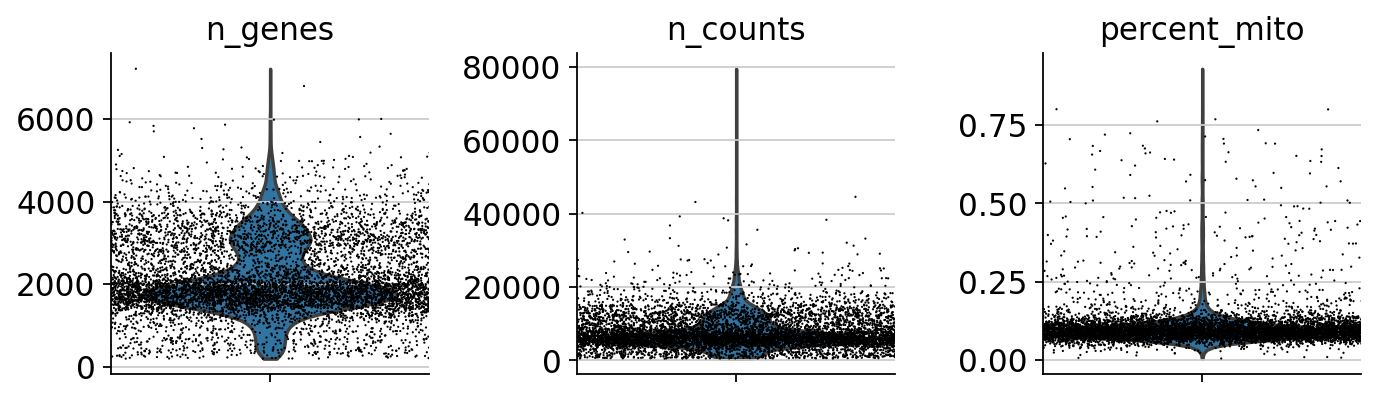

In [9]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.8, multi_panel=True)

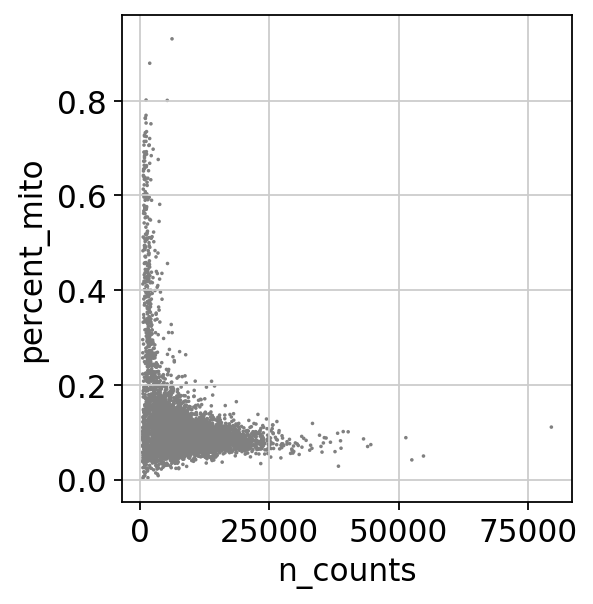

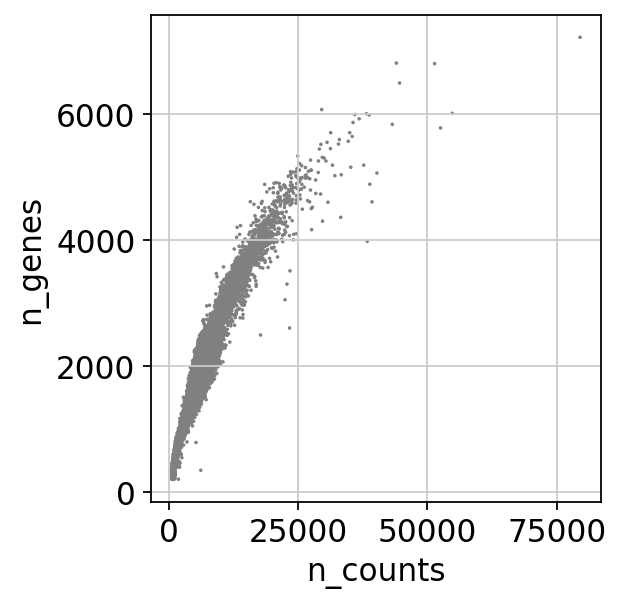

CPU times: user 807 ms, sys: 105 ms, total: 912 ms
Wall time: 923 ms


In [10]:
%%time
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [11]:
adata = adata[adata.obs['n_genes'] < 4500, :]
adata = adata[adata.obs['percent_mito'] < 0.3, :]

In [12]:
adata

View of AnnData object with n_obs × n_vars = 11090 × 20292 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells'

normalizing counts per cell
    finished (0:00:00)


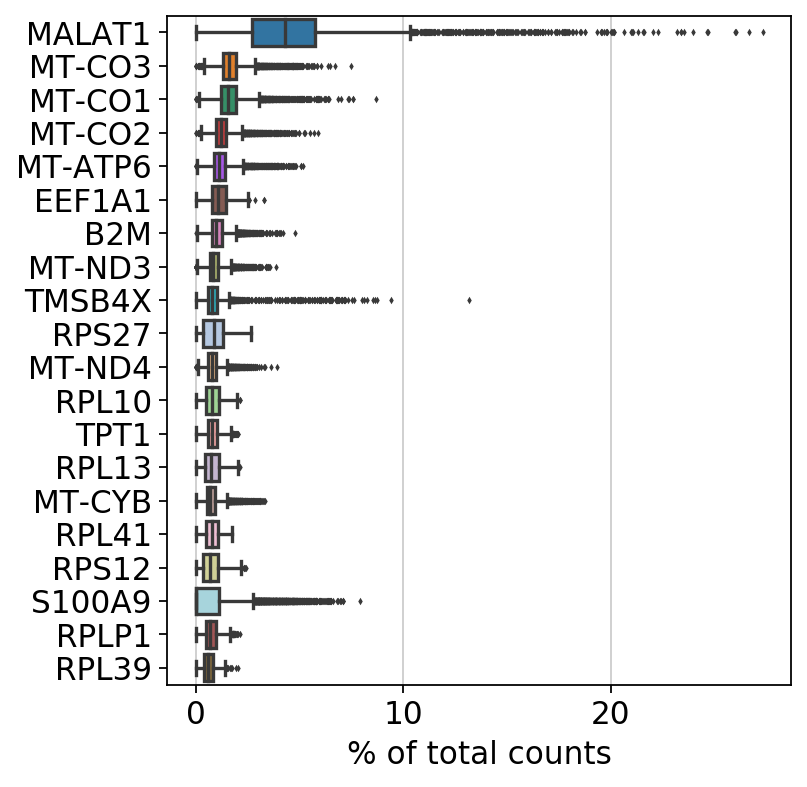

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20)

### Processing step
- Normalize the counts to same scale (10,000)
- Transform to log scale 

In [14]:
%%time
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
CPU times: user 676 ms, sys: 598 ms, total: 1.27 s
Wall time: 1.29 s


### Processing step
- Focus on highly variable genes to find the gene expression differences
- Gene Dispersion relative to mean expression across all cells 

extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


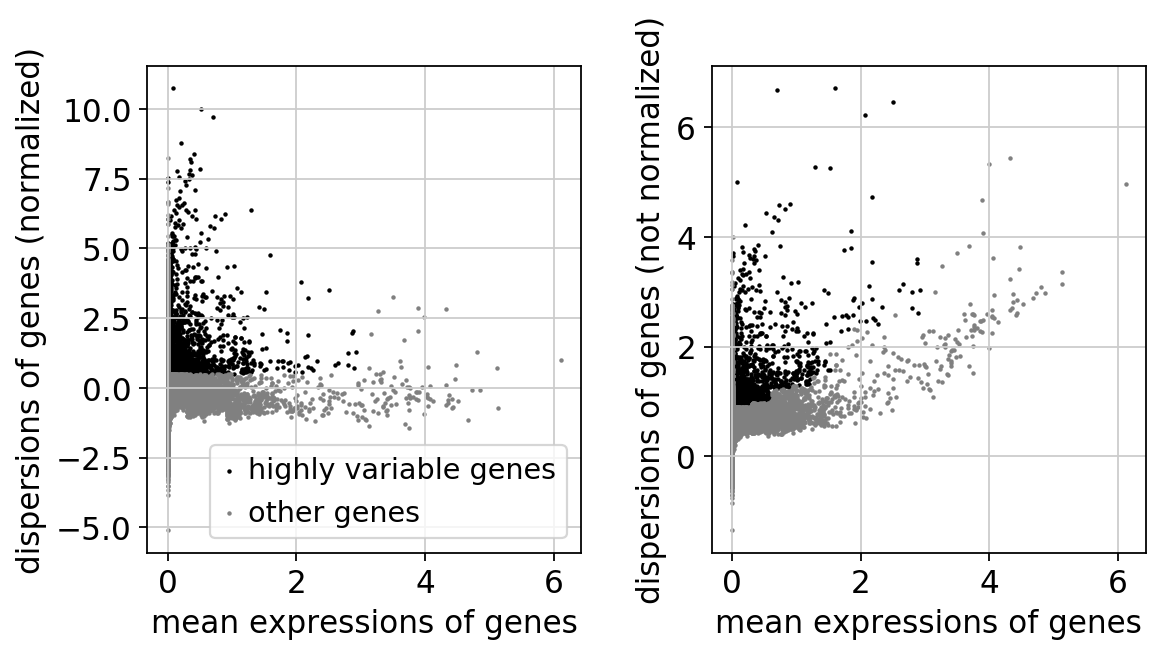

In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [16]:
adata = adata[:, adata.var['highly_variable']]

### Processing step
- Regress out the variation arising due to differences in
    - counts between cells
    - Mitochondrial percentage
- Scale to unit variance and zero mean

In [17]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:07:14)


In [18]:
sc.pp.scale(adata, max_value=10)

### Data Visualisation
**Principle Component Analysis**
- PCA using highly variable genes. 
- We can see if known markers help makes sense of the separated data 
- Assess which components drive the variation in the dataset

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:13)


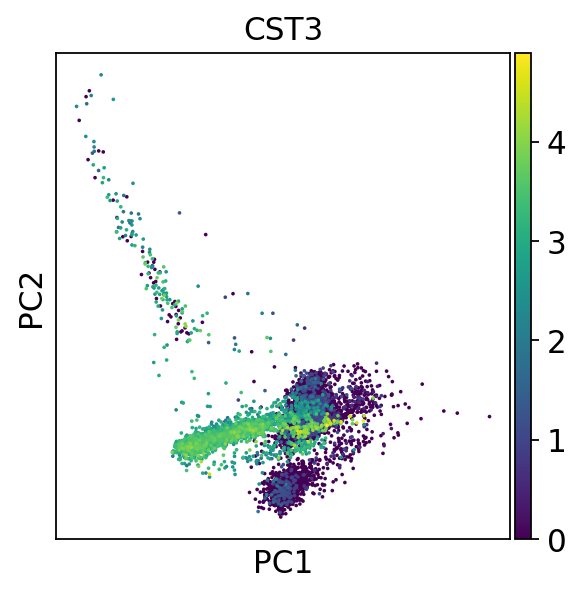

In [20]:
sc.pl.pca(adata, color='CST3')

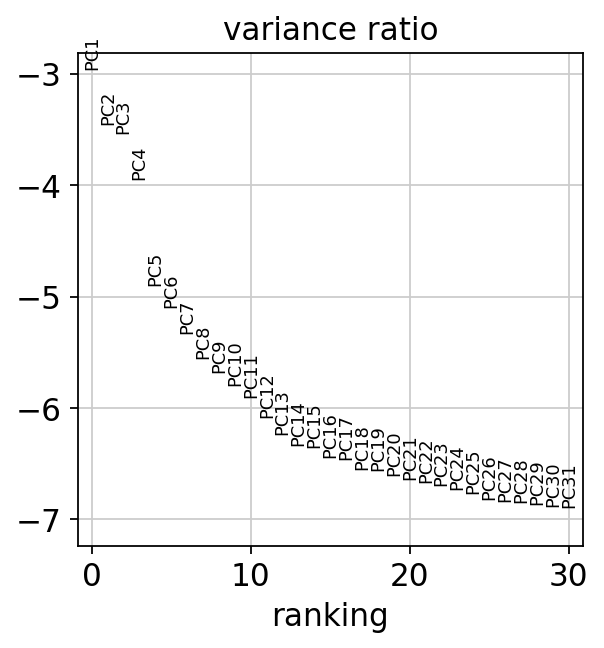

In [21]:
sc.pl.pca_variance_ratio(adata, log=True)

In [22]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:09)


#### **tSNE**

In [23]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:05:10)


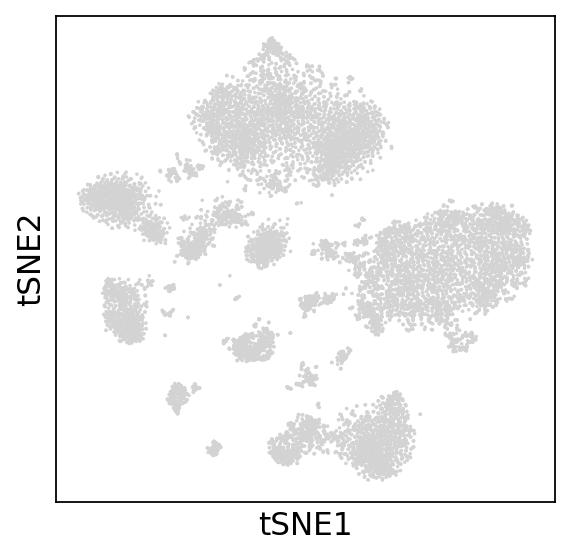

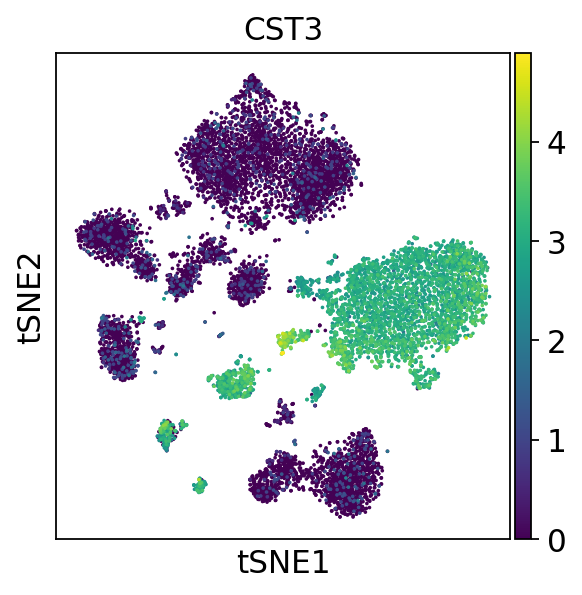

In [24]:
sc.pl.tsne(adata)
sc.pl.tsne(adata, color='CST3')

#### **UMAP**

In [25]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


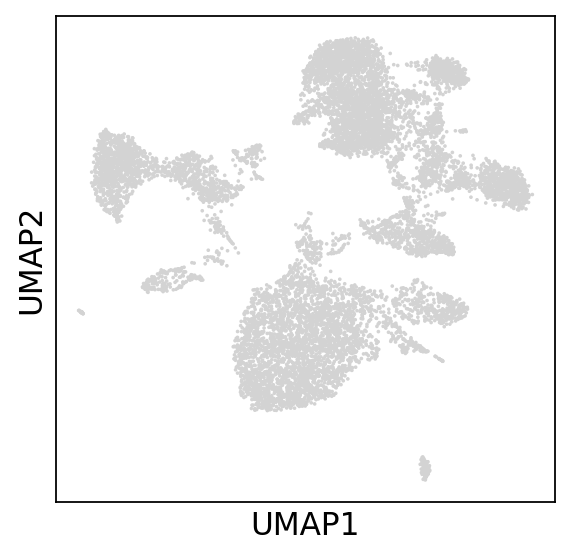

In [26]:
sc.pl.umap(adata)

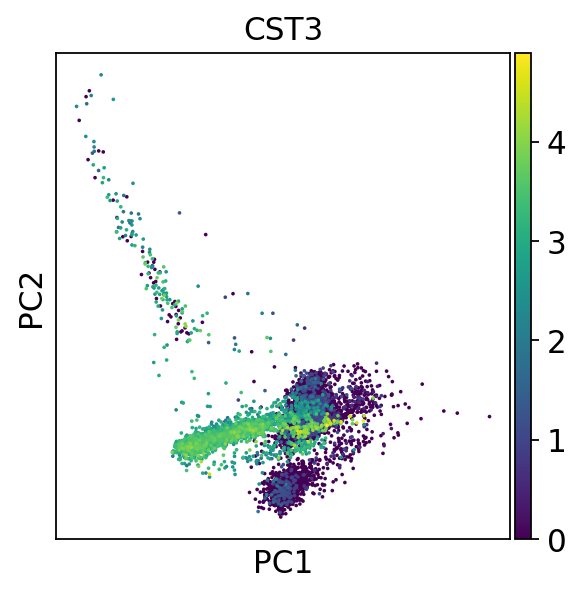

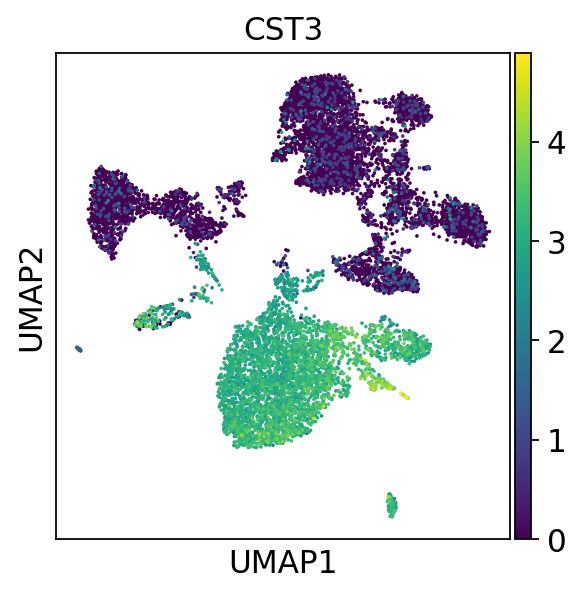

In [27]:
sc.pl.pca(adata, color='CST3')
sc.pl.umap(adata, color='CST3')


**Compare whether known markers help distinguish big clusters**

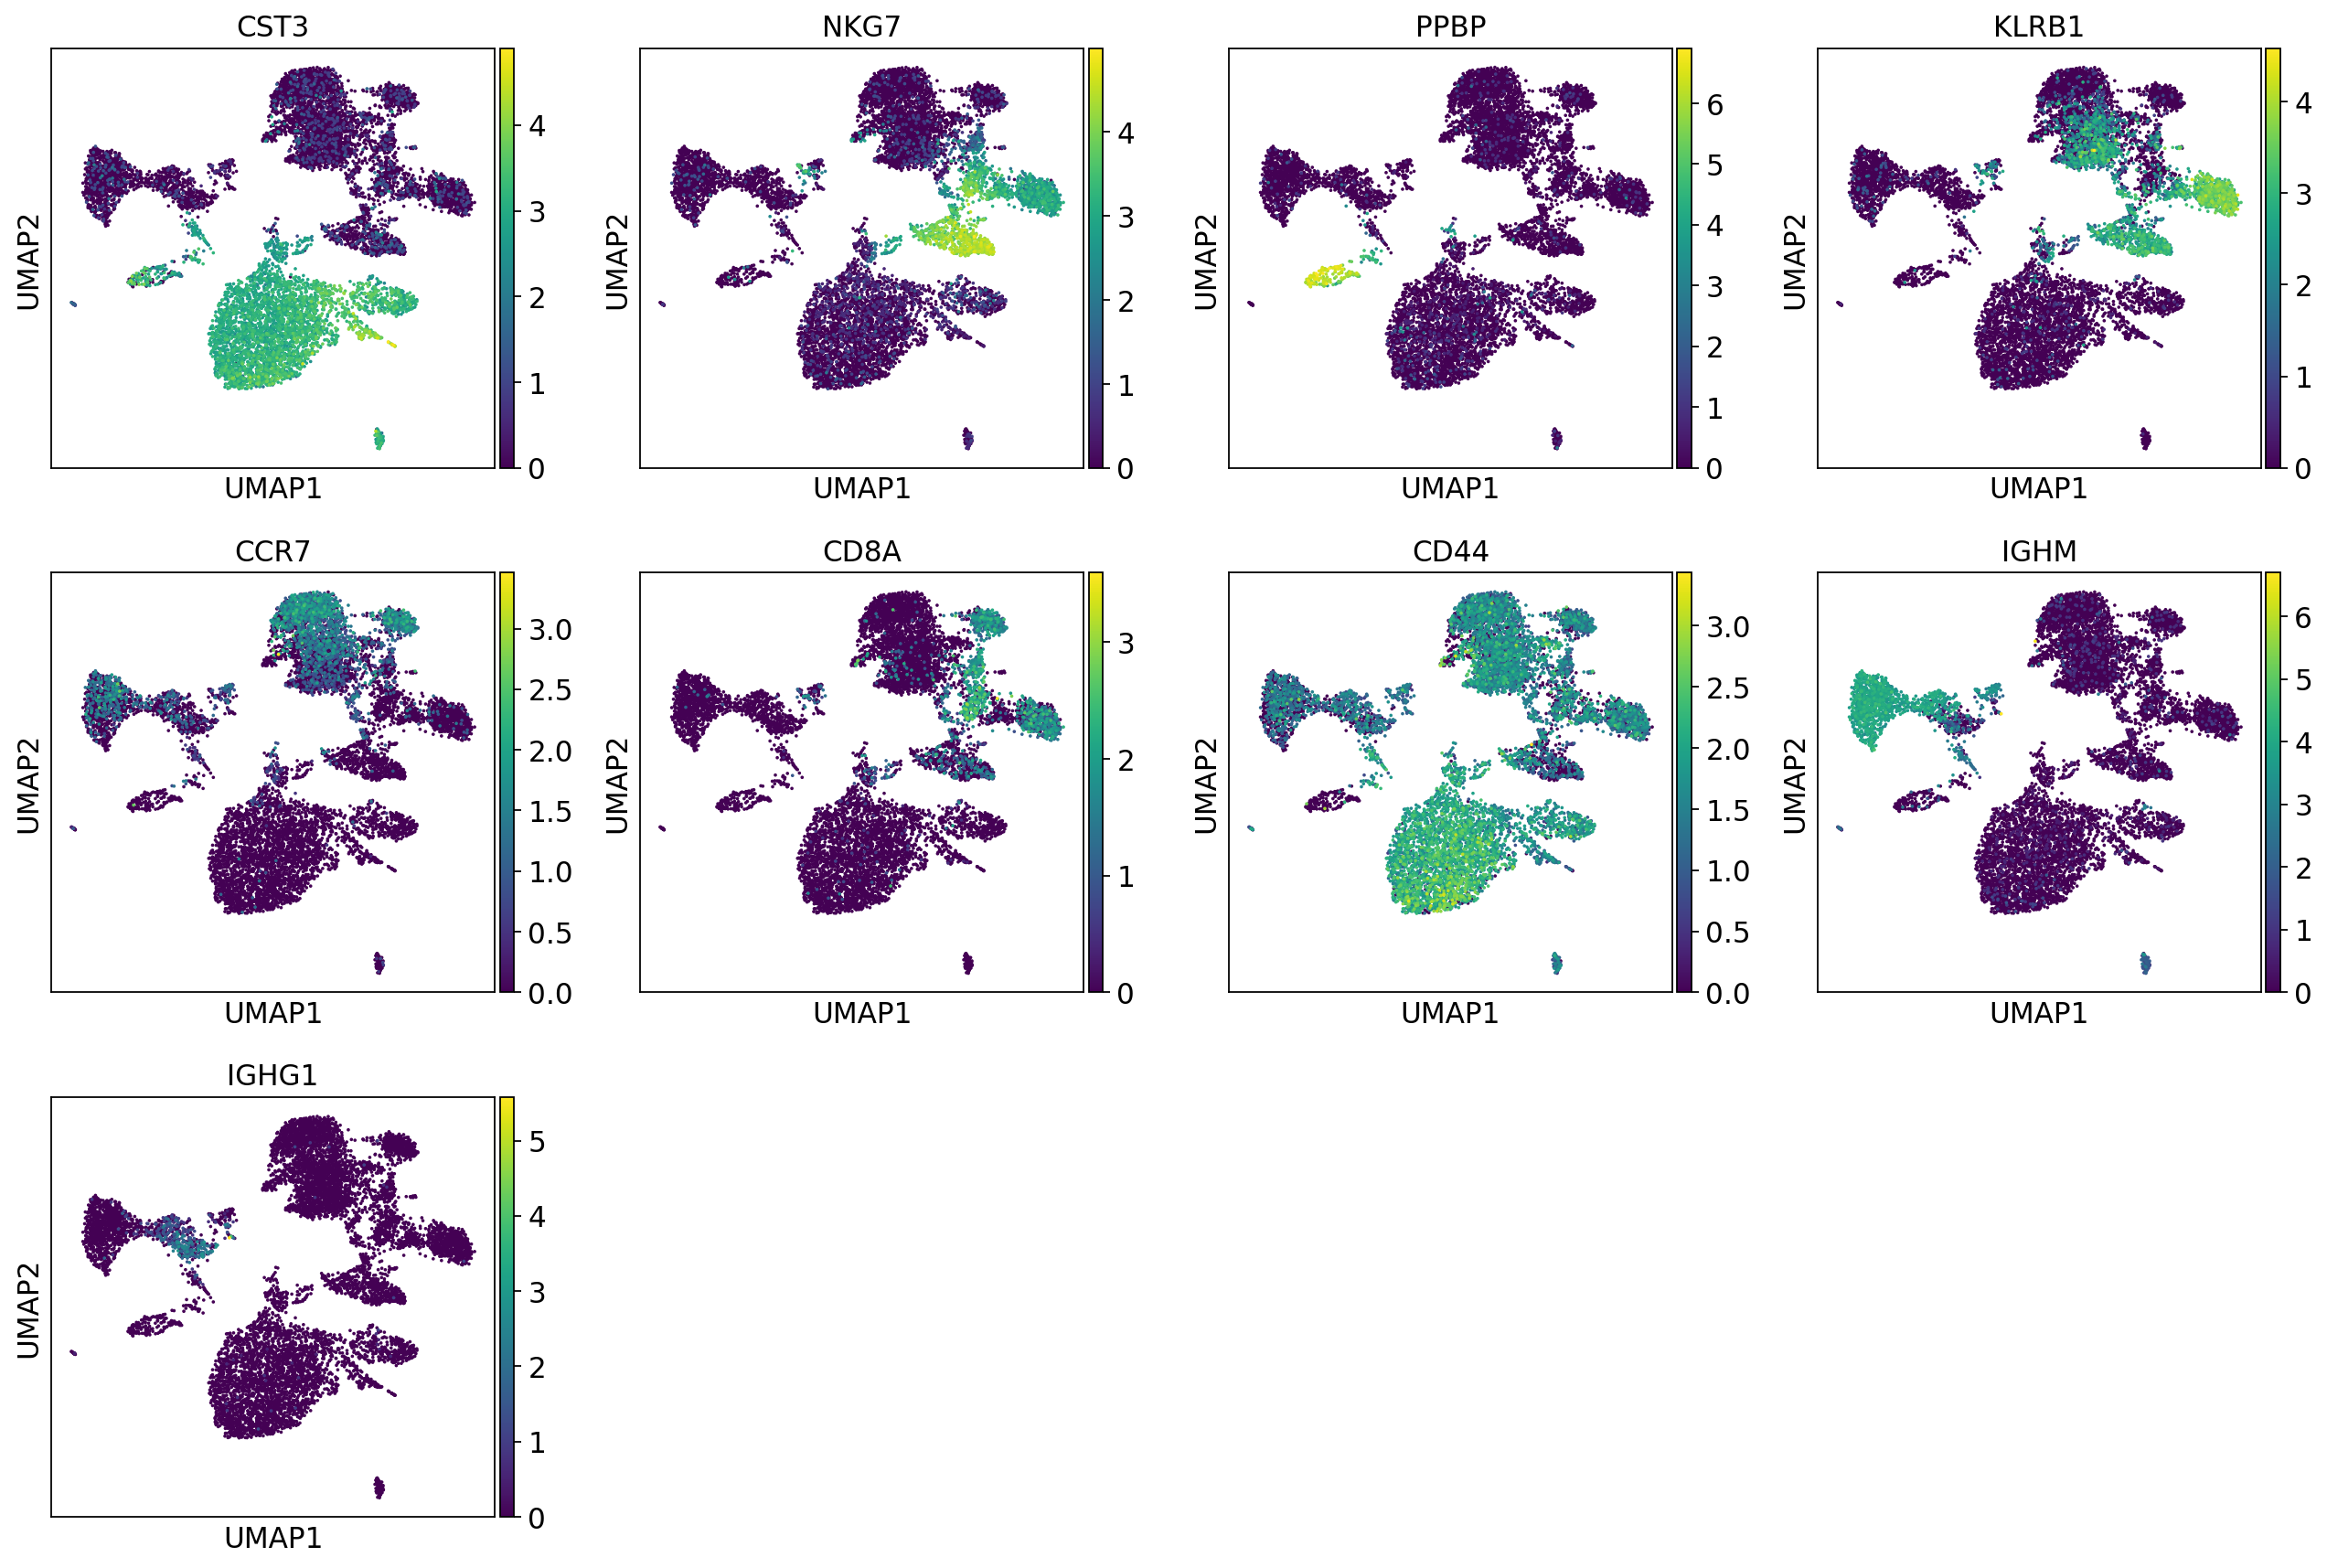

In [28]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP', 'KLRB1', 'CCR7', 'CD8A', 'CD44', 'IGHM', 'IGHG1'])

### Clustering
**Leiden Clustering**

In [29]:
sc.tl.leiden(adata, 0.45)

running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


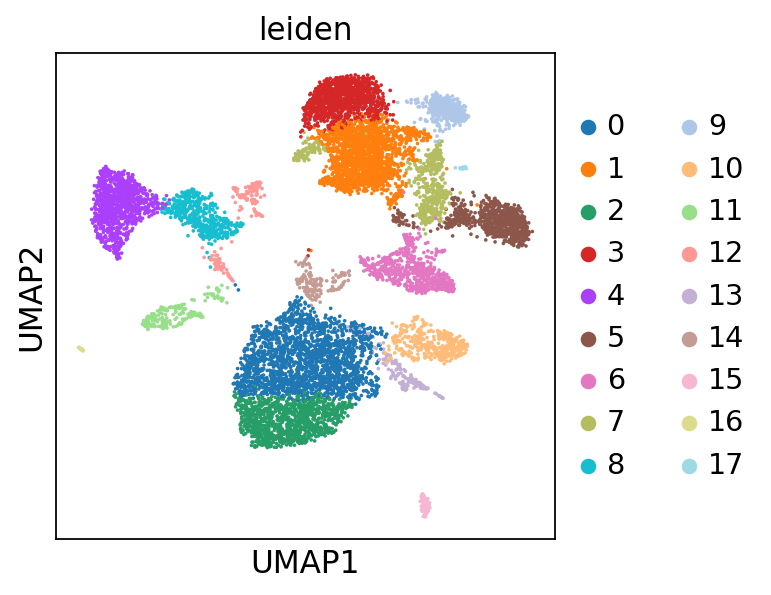

In [30]:
sc.pl.umap(adata, color=['leiden'])

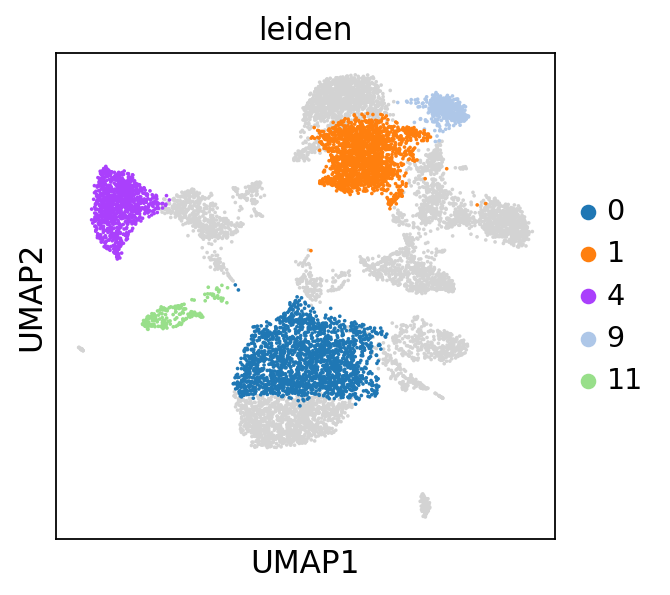

In [31]:
 sc.pl.umap(adata, color=['leiden'], groups=['0', '1', '4', '9', '11'])

### Find marker genes per Leiden cluster

**Gene association to cluster via t-test **

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


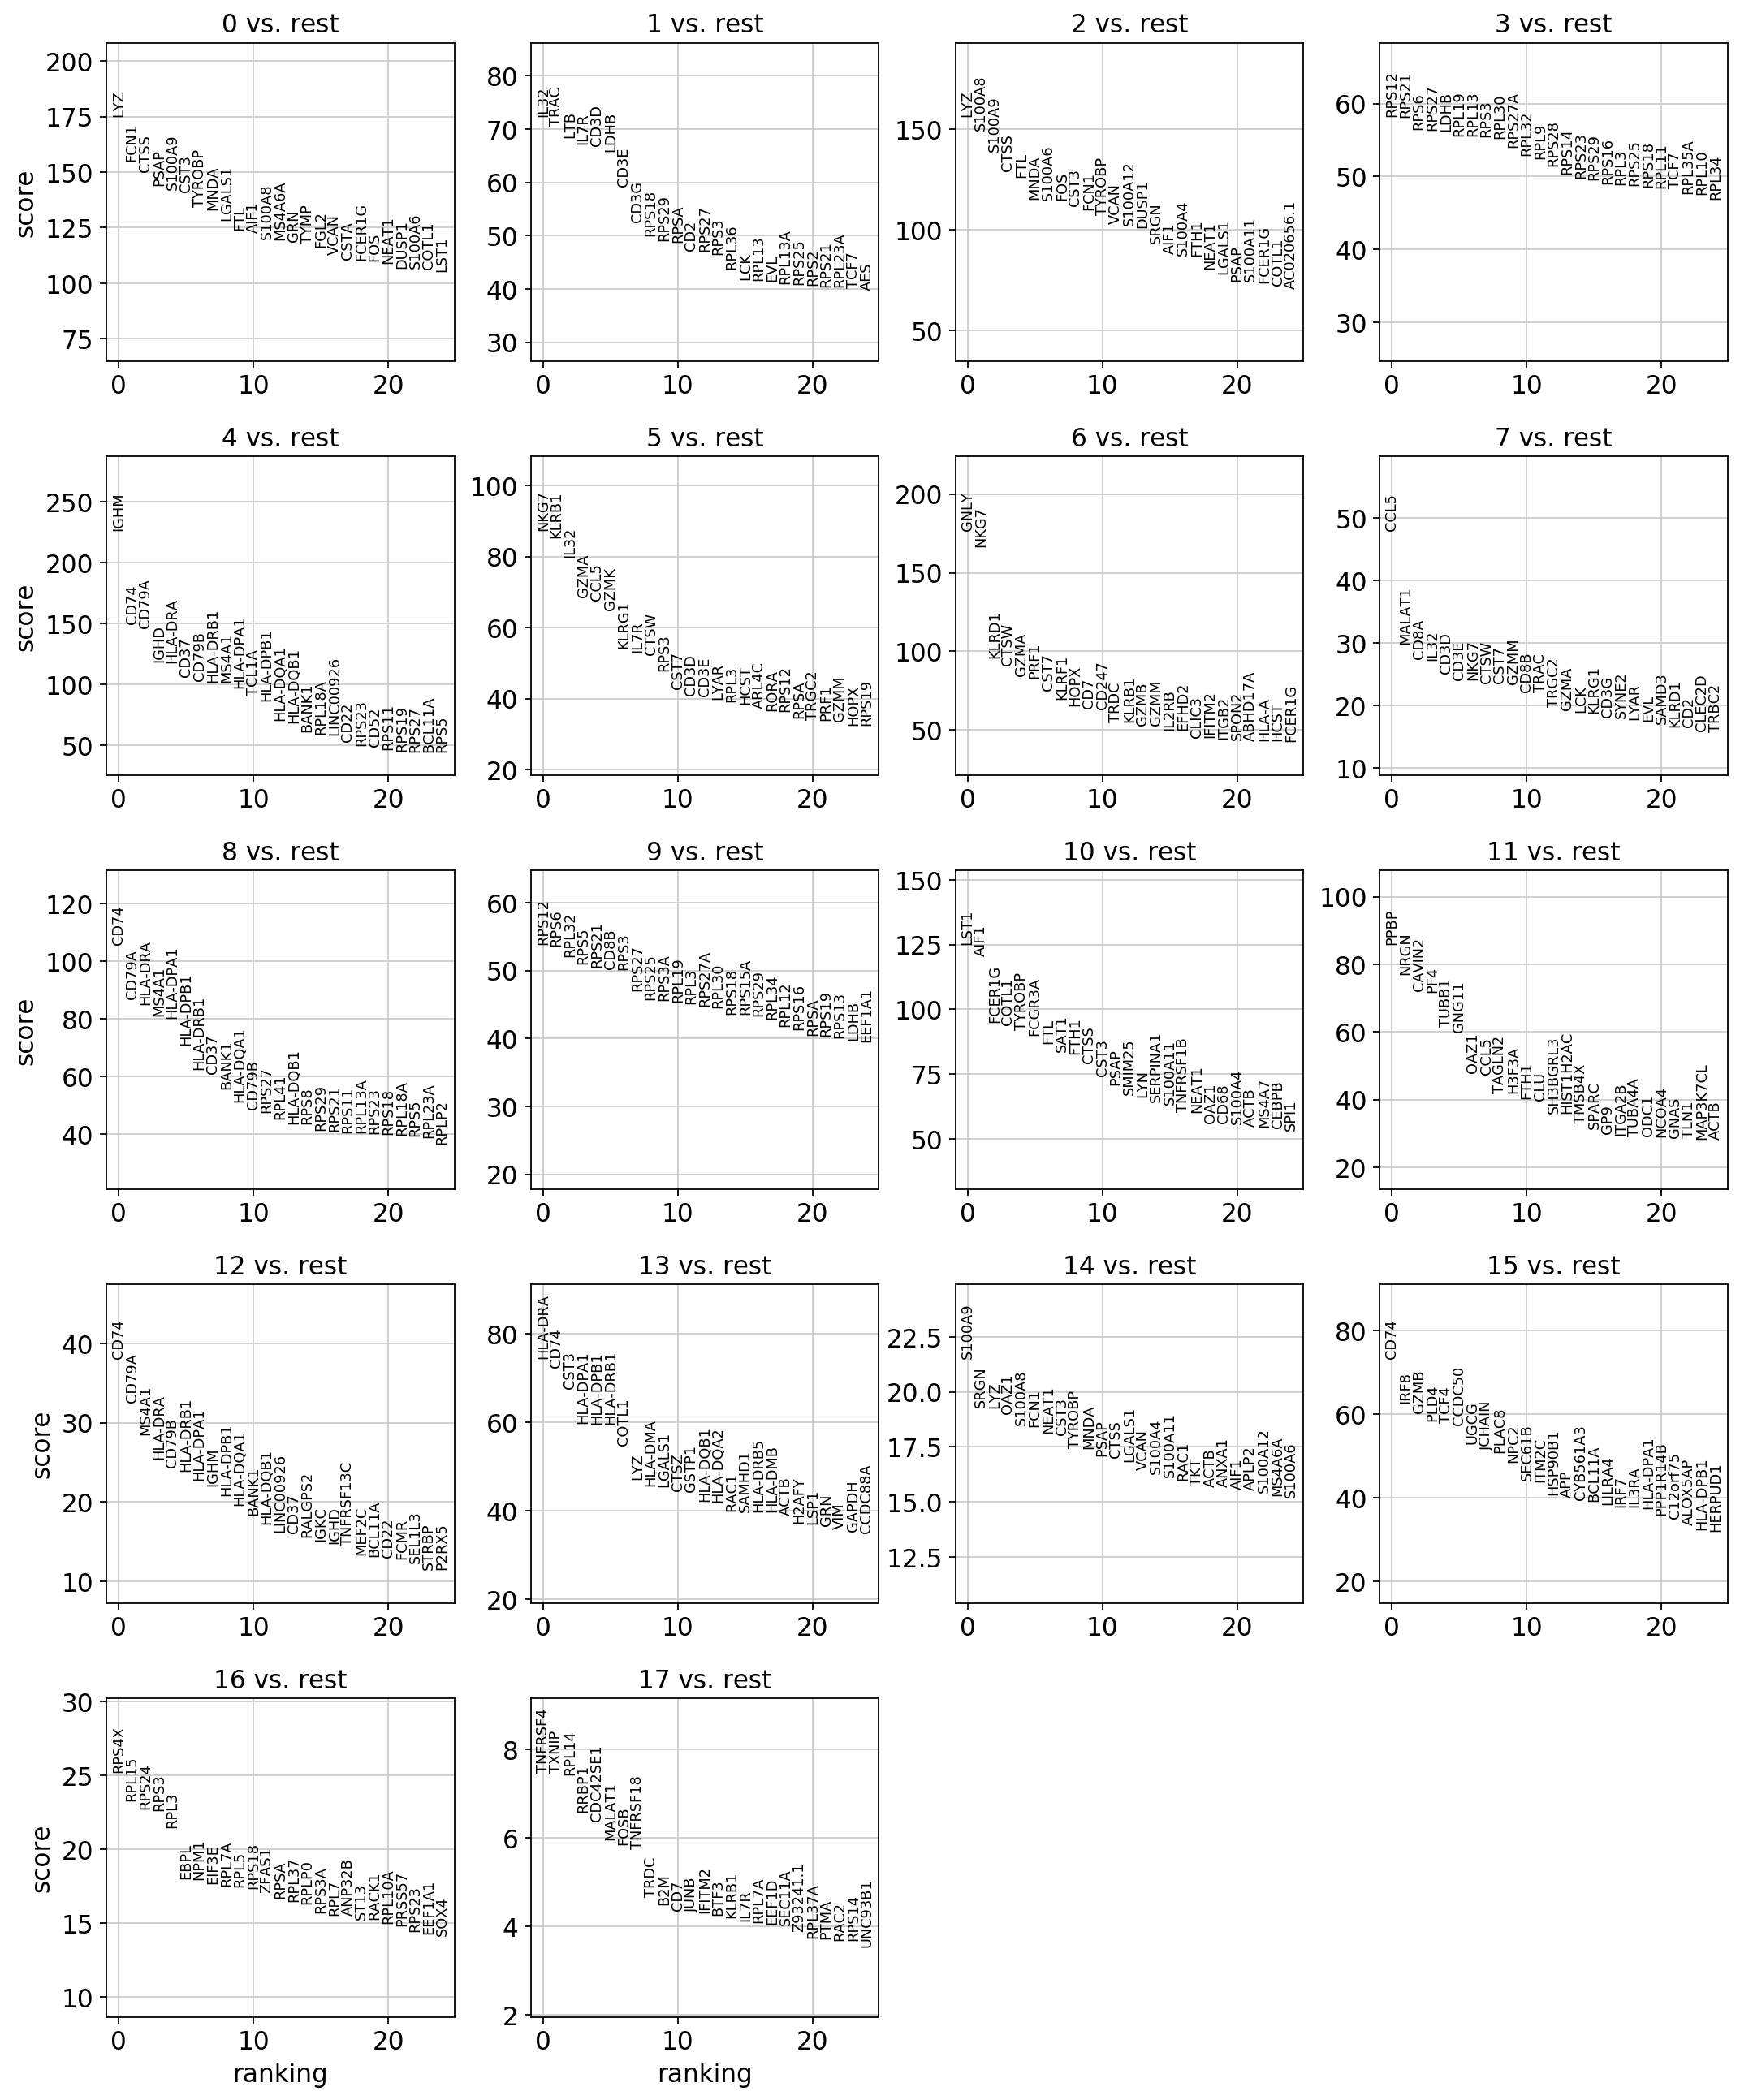

In [32]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

**An alternative to the parametric t-test is the non-parametric [Wilcoxon rank-sum (Mann-Whitney-U)](https://de.wikipedia.org/wiki/Wilcoxon-Mann-Whitney-Test) test. **

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:23)


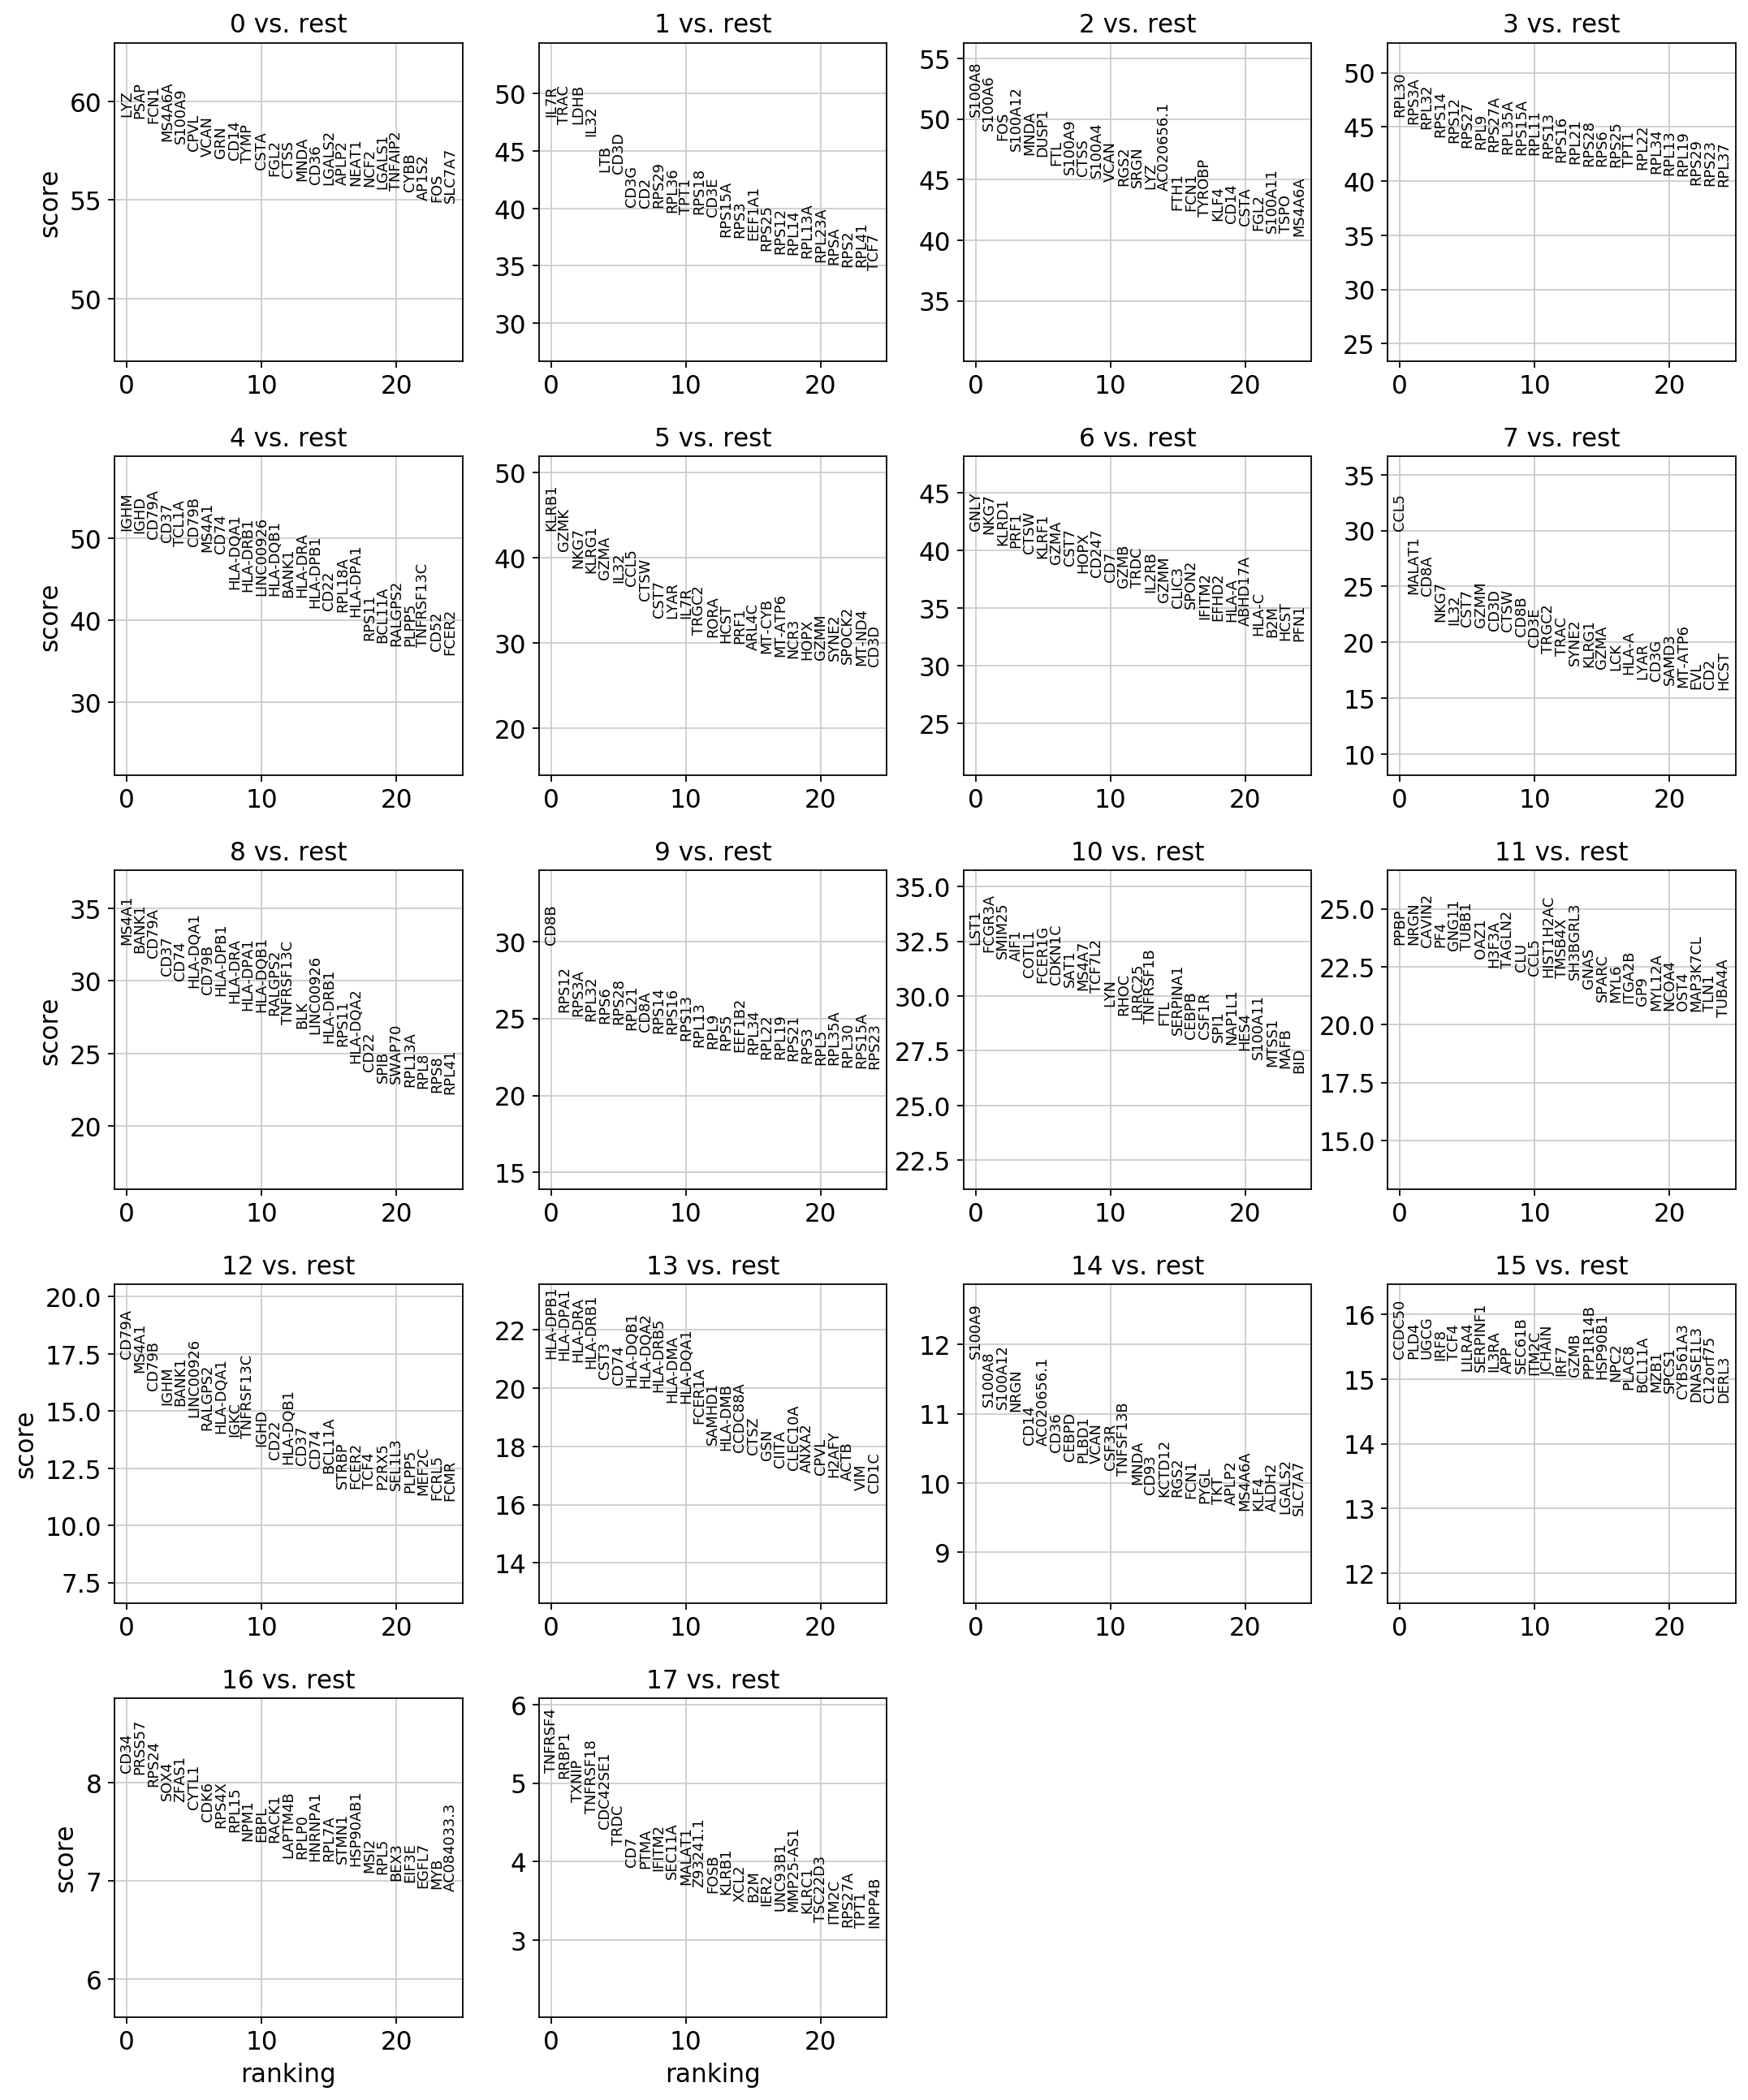

In [33]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', corr_method="bonferroni")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

**Other approaches also exist**

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:02:15)


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


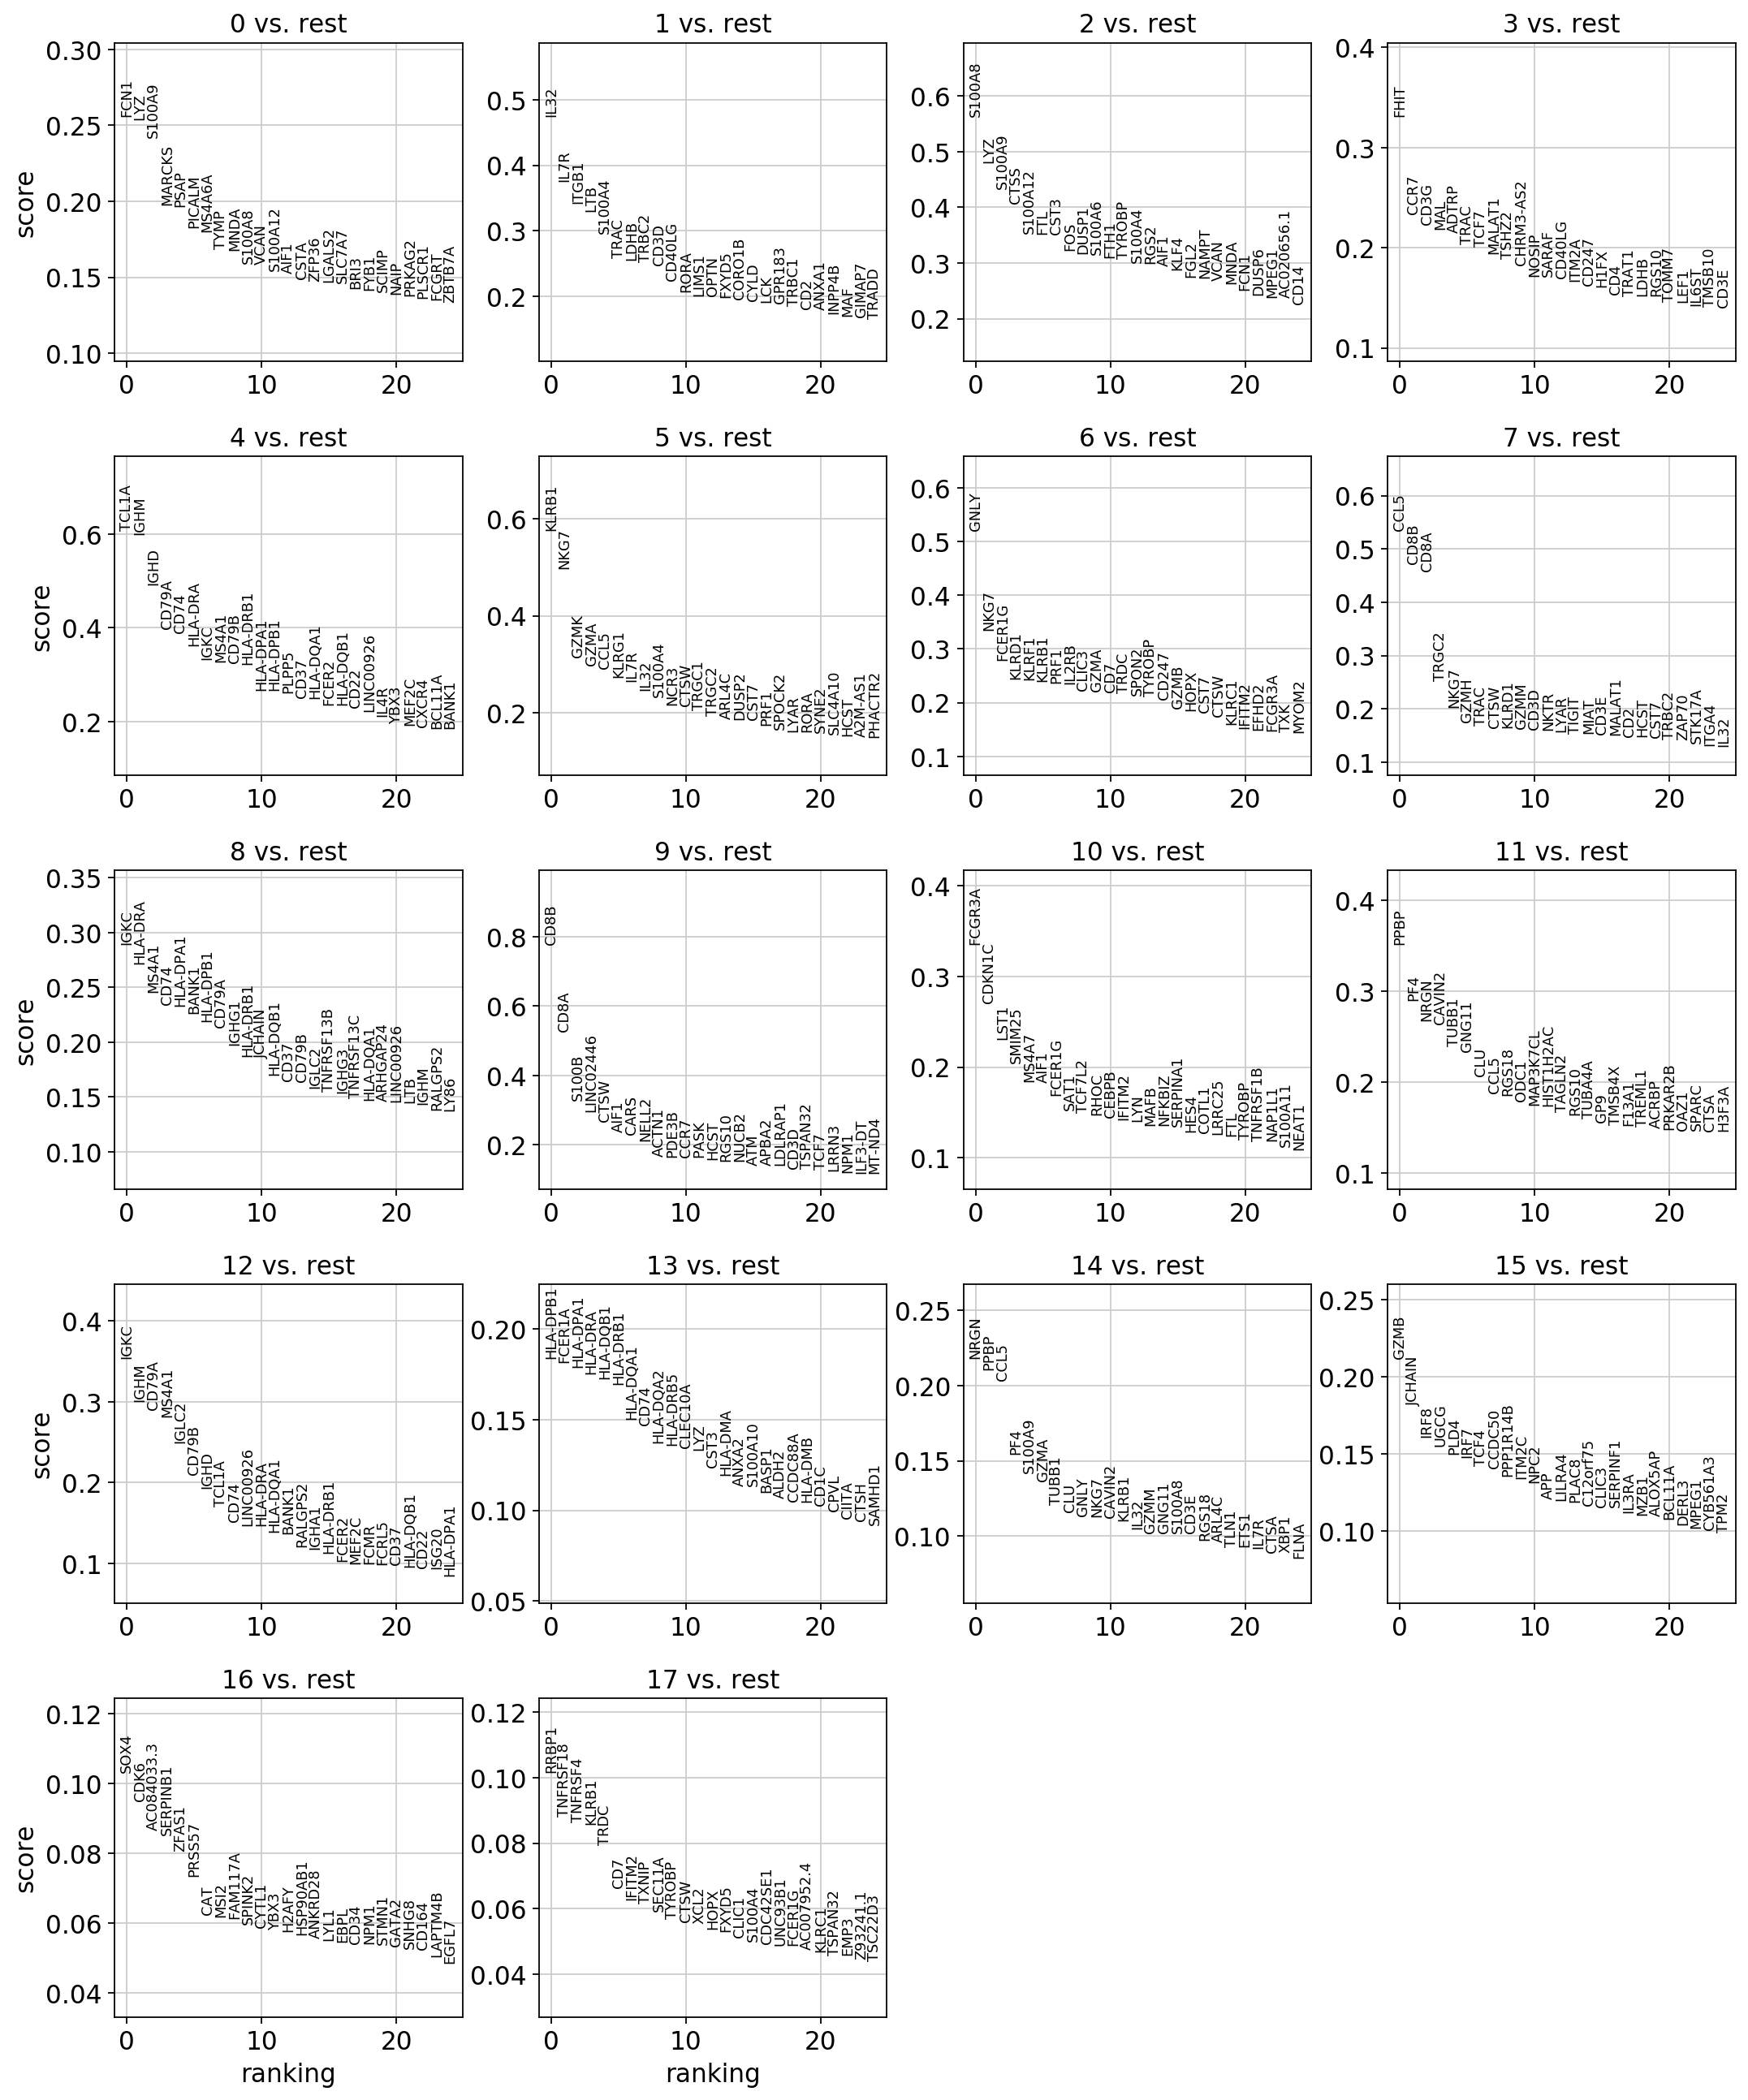

In [34]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

Lets use t-test for now

In [35]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


**Show the 10 top ranked genes per cluster in a dataframe.**

In [36]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

0      1       2       3         4      5      6       7         8  \
0     LYZ   IL32     LYZ   RPS12      IGHM   NKG7   GNLY    CCL5      CD74   
1    FCN1   TRAC  S100A8   RPS21      CD74  KLRB1   NKG7  MALAT1     CD79A   
2    CTSS    LTB  S100A9    RPS6     CD79A   IL32  KLRD1    CD8A   HLA-DRA   
3    PSAP   IL7R    CTSS   RPS27      IGHD   GZMA   CTSW    IL32     MS4A1   
4  S100A9   CD3D     FTL    LDHB   HLA-DRA   CCL5   GZMA    CD3D  HLA-DPA1   
5    CST3   LDHB    MNDA   RPL19      CD37   GZMK   PRF1    CD3E  HLA-DPB1   
6  TYROBP   CD3E  S100A6   RPL13     CD79B  KLRG1   CST7    NKG7  HLA-DRB1   
7    MNDA   CD3G     FOS    RPS3  HLA-DRB1   IL7R  KLRF1    CTSW      CD37   
8  LGALS1  RPS18    CST3   RPL30     MS4A1   CTSW   HOPX    CST7     BANK1   
9     FTL  RPS29    FCN1  RPS27A  HLA-DPA1   RPS3    CD7    GZMM  HLA-DQA1   

       9      10      11        12        13      14      15     16        17  
0  RPS12    LST1    PPBP      CD74   HLA-DRA  S100A9    CD74  RPS4X   TNFRSF4  
1   RPS6    AIF1    NRGN     CD79A      CD74    SRGN    IRF8  RPL15     TXNIP  
2  RPL32  FCER1G  CAVIN2     MS4A1      CST3     LYZ    GZMB  RPS24     RPL14  
3   RPS5   COTL1     PF4   HLA-DRA  HLA-DPA1    OAZ1    PLD4   RPS3     RRBP1  
4  RPS21  TYROBP   TUBB1     CD79B  HLA-DPB1  S100A8    TCF4   RPL3  CDC42SE1  
5   CD8B  FCGR3A   GNG11  HLA-DRB1  HLA-DRB1    FCN1  CCDC50   EBPL    MALAT1  
6   RPS3     FTL    OAZ1  HLA-DPA1     COTL1   NEAT1    UGCG   NPM1      FOSB  
7  RPS27    SAT1    CCL5      IGHM       LYZ    CST3  JCHAIN  EIF3E  TNFRSF18  
8  RPS25    FTH1  TAGLN2  HLA-DPB1   HLA-DMA  TYROBP   PLAC8  RPL7A      TRDC  
9  RPS3A    CTSS   H3F3A  HLA-DQA1    LGALS1    MNDA    NPC2   RPL5       B2M

**Pull the genes, their clusters and p-value**


In [37]:
genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).to_numpy()
pvals = pd.DataFrame(adata.uns['rank_genes_groups']['pvals']).to_numpy()

In [38]:
unique = np.unique(adata.obs.leiden.values.astype(int)).astype(str)
markers_gene = pd.DataFrame(index=unique, columns=["gene_name", "p_value"])

In [39]:
for un, u in enumerate(unique):
    g = genes[:,un]
    p = pvals[:,un]
    markers_gene.loc[u]["gene_name"]  = g.tolist()
    markers_gene.loc[u]["p_value"] = p.tolist()

In [40]:
markers_gene = markers_gene.apply(pd.Series.explode).reset_index()
markers_gene = markers_gene.rename(columns={'index':'leiden'})

**Marker gene per Leiden Cluster**

In [41]:
markers_gene.drop_duplicates(["leiden"]) # just showing the top candidate per cluster

leiden gene_name       p_value
0         0       LYZ             0
100       1      IL32             0
200       2       LYZ             0
300       3     RPS12             0
400       4      IGHM             0
500       5      NKG7             0
600       6      GNLY             0
700       7      CCL5  9.45264e-203
800       8      CD74             0
900       9     RPS12  2.43758e-235
1000     10      LST1             0
1100     11      PPBP  3.67274e-152
1200     12      CD74  1.53534e-104
1300     13   HLA-DRA   6.7398e-160
1400     14    S100A9   7.49711e-49
1500     15      CD74   1.5099e-103
1600     16     RPS4X   5.25062e-18
1700     17   TNFRSF4   2.09261e-05

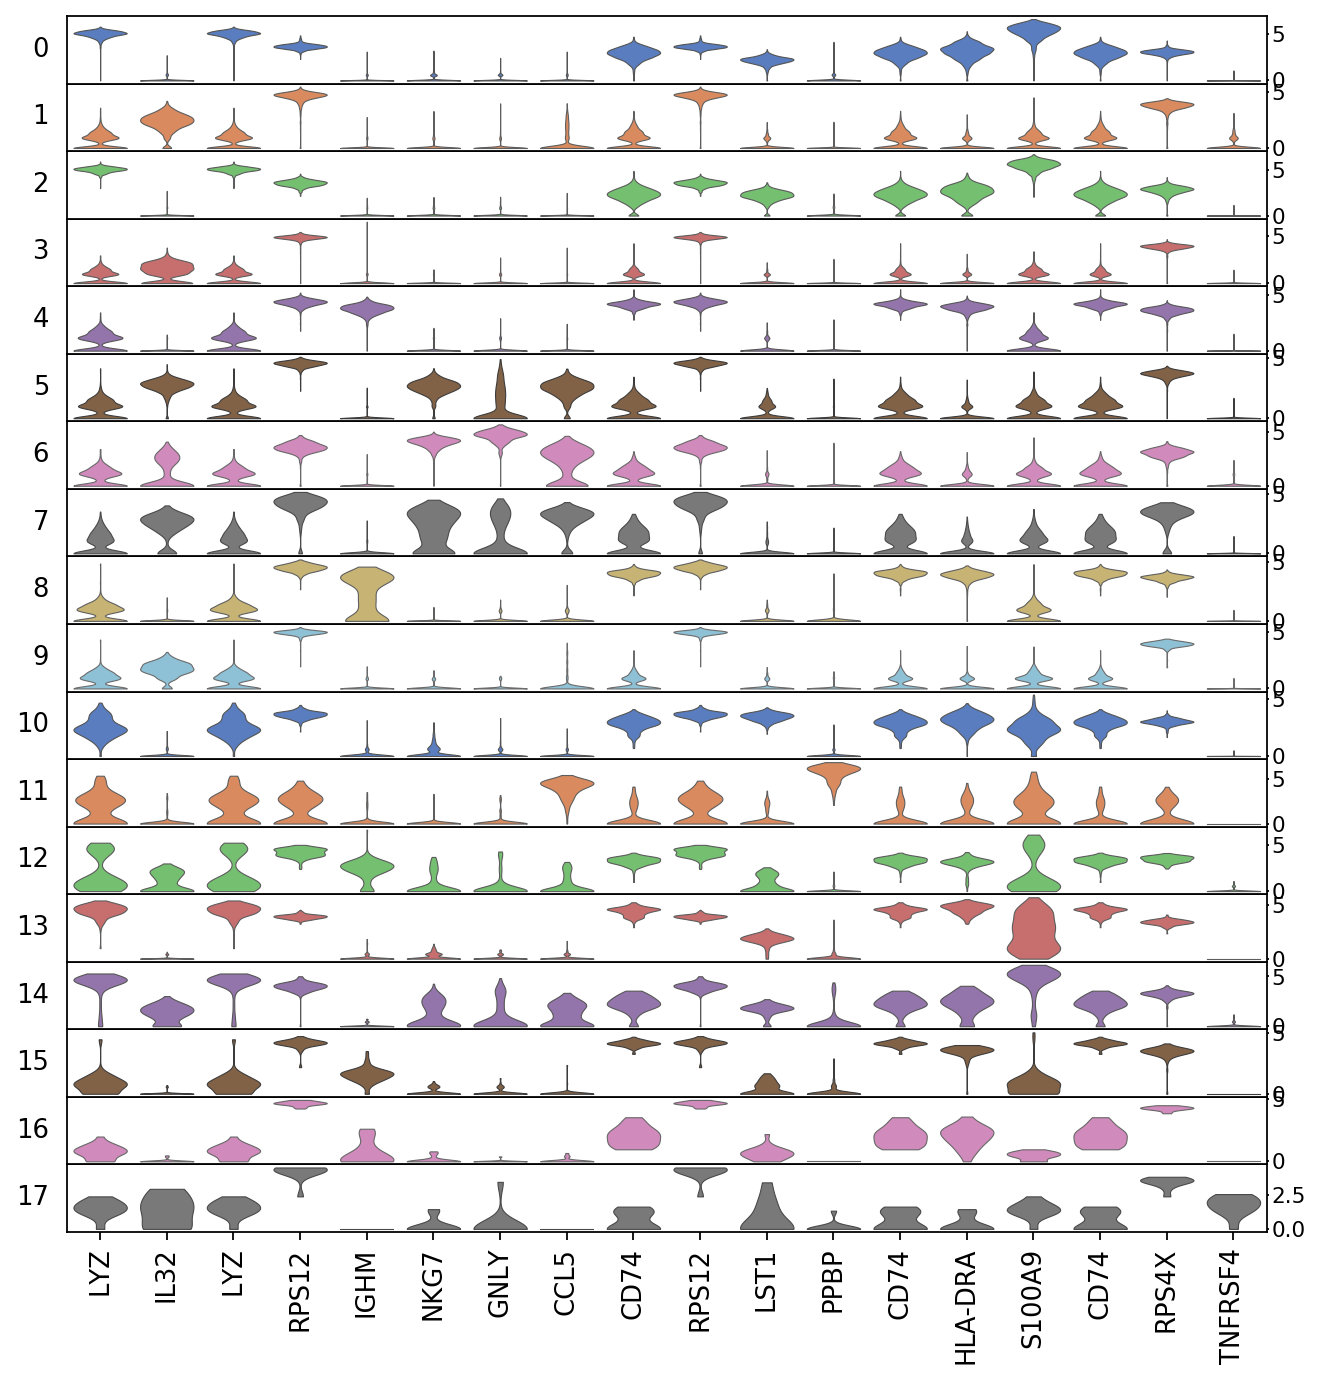

In [42]:
sc.pl.stacked_violin(adata, groupby='leiden', var_names=tuple(markers_gene.drop_duplicates(["leiden"])['gene_name']), figsize=[10,10])

**Marker genes based on manual classification (or subselecting key genes)**

In [43]:
manual_marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'TRAC', 'CD8A', 'CD8B','CD4', 'LYZ', 'CD14',
                'LGALS3', 'S100A8','CD14', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7','IL6R', 'FCER1A', 'CST3', 'PPBP', 'IL3RA', 'CD40']

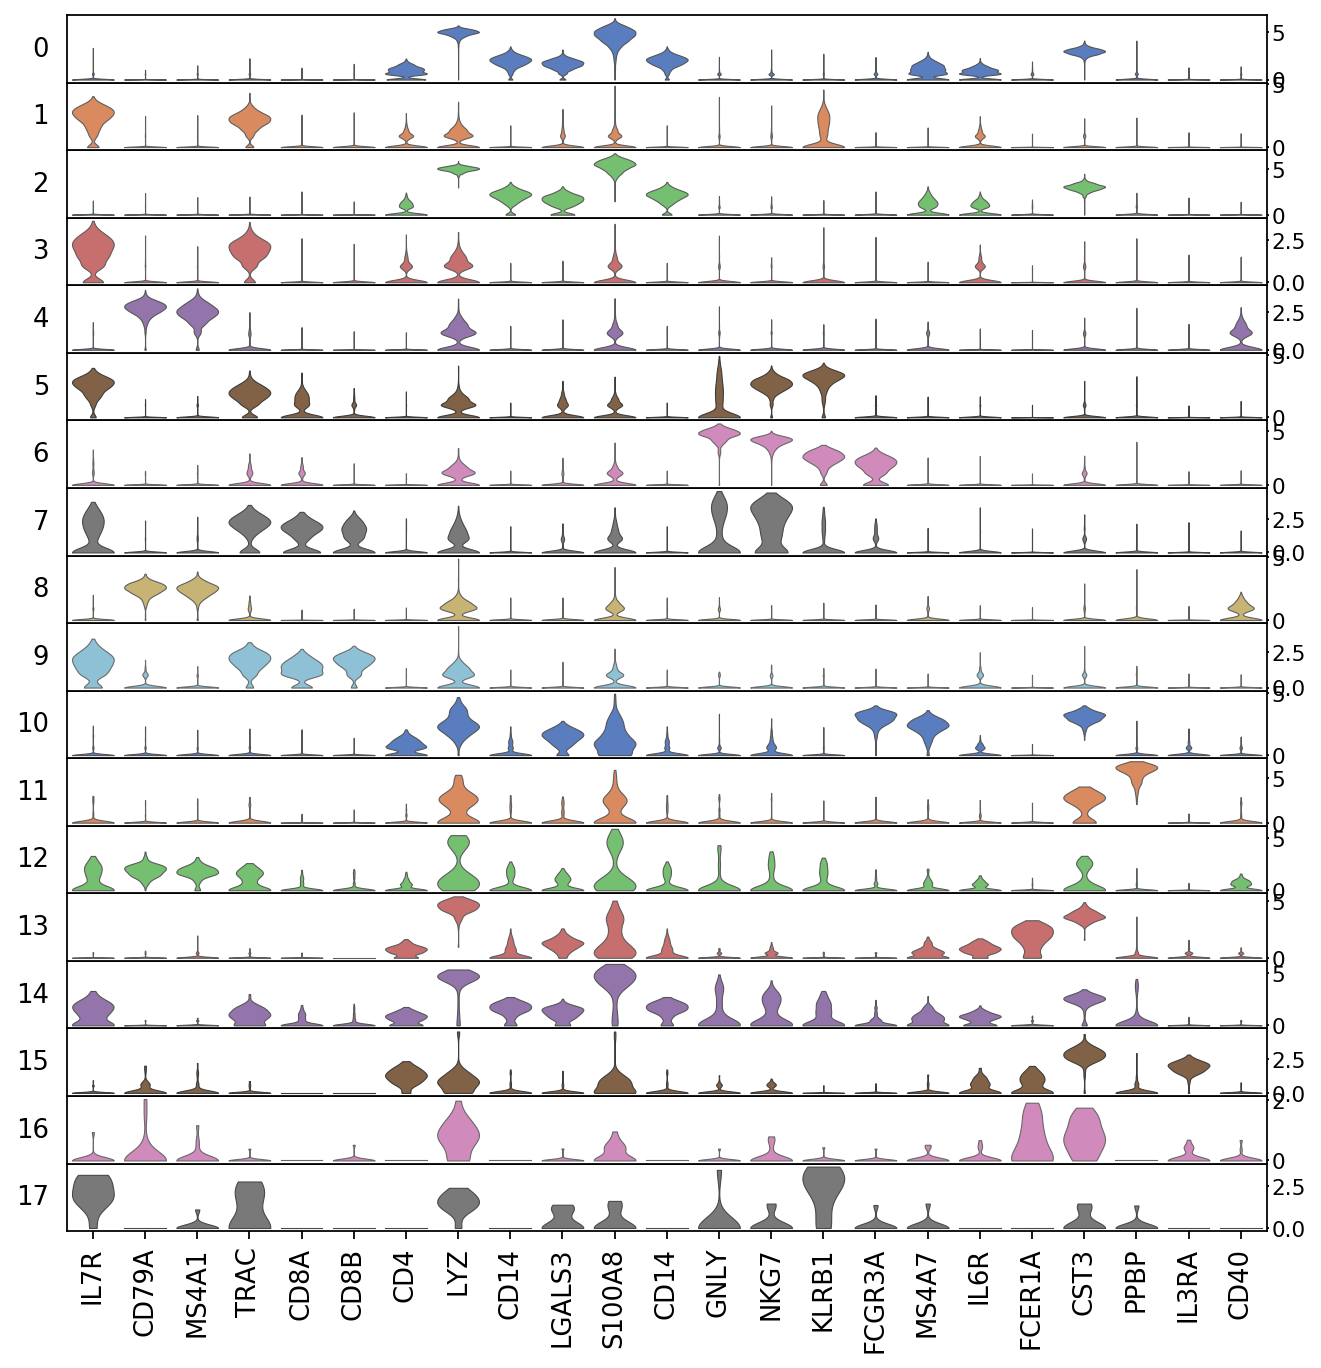

In [44]:
sc.pl.stacked_violin(adata, groupby='leiden', var_names=manual_marker_genes, figsize=[10,10])

### **Mark clusters with respective gene names**
Manual process

In [45]:
new_cluster_names = [
    'CD14+ Monocytes1', 
    'Double negative T cells1',
    'CD14+ Monocytes2', 
    'Double negative T cells2',
    'Mature B cell',
    'CD8 Effector1', 
    'NK cells','CD8 Effector2','Plasma cell','CD8 Naive','FCGR3A+ Monocytes','Megakaryocytes','Immature B cell','CD14+ Monocytes3','Dendritic cells1',
    'Dendritic cells2','pDC','CD8 Effector3']
adata.rename_categories('leiden', new_cluster_names)

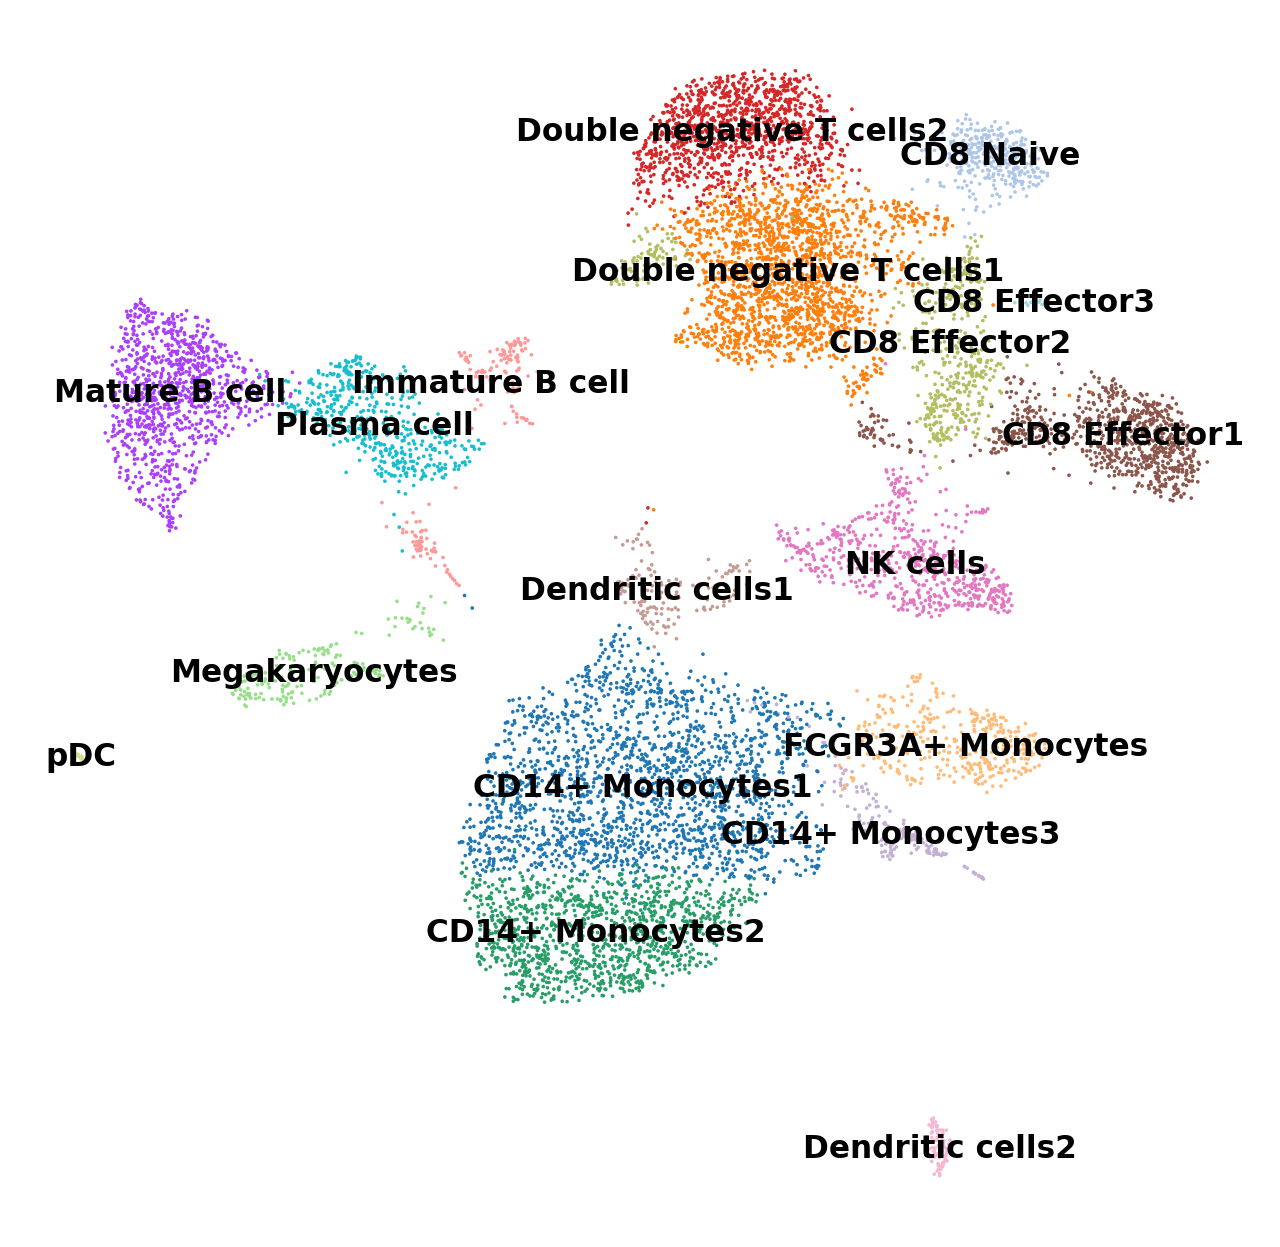

In [46]:
rcParams['figure.figsize'] = 10,10
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False)

### Only for demo
**Run on a specialised data with actual lineage relationships**

In [47]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:05:17)


In [49]:
sc.pp.neighbors(adata, n_neighbors=30)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:04)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:21)


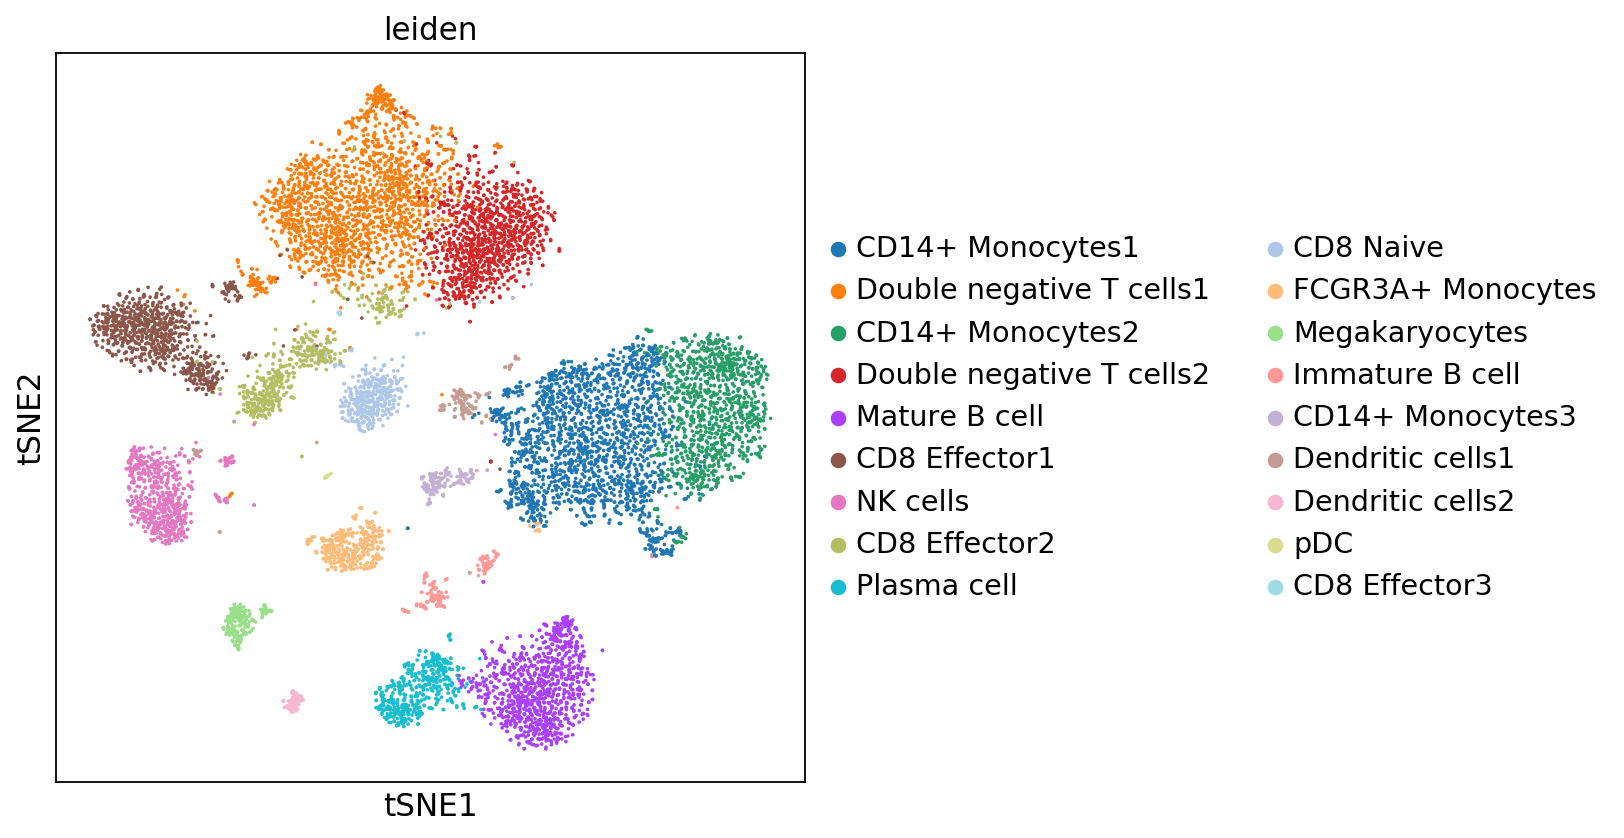

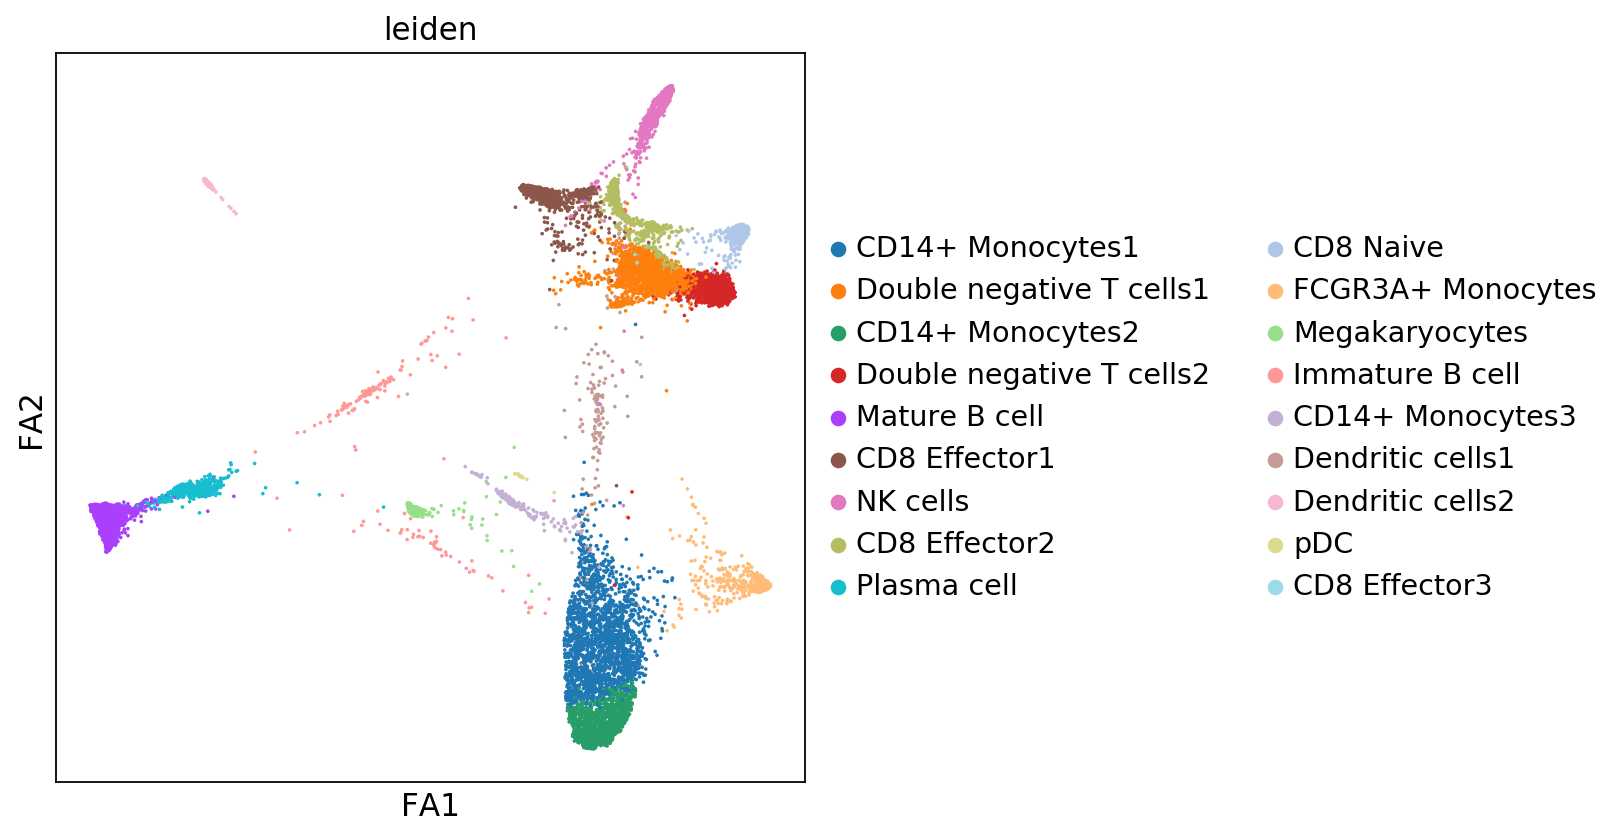

In [50]:
rcParams['figure.figsize'] = 6,6
sc.pl.tsne(adata, color='leiden')
sc.pl.draw_graph(adata, color='leiden')

In [ ]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

## Feedback

If you find any issues with this notebook, pls report to us or submit pull requests [Github](https://github.com/natarajanlab/.ipynb).
***
You can contact us at<br>
Andreas Møller: andreasfm@bmb.sdu.dk<br>
Kedar Natarajan: knn@bmb.sdu.dk (twitter: *@kedar_natarajan* )<br> 